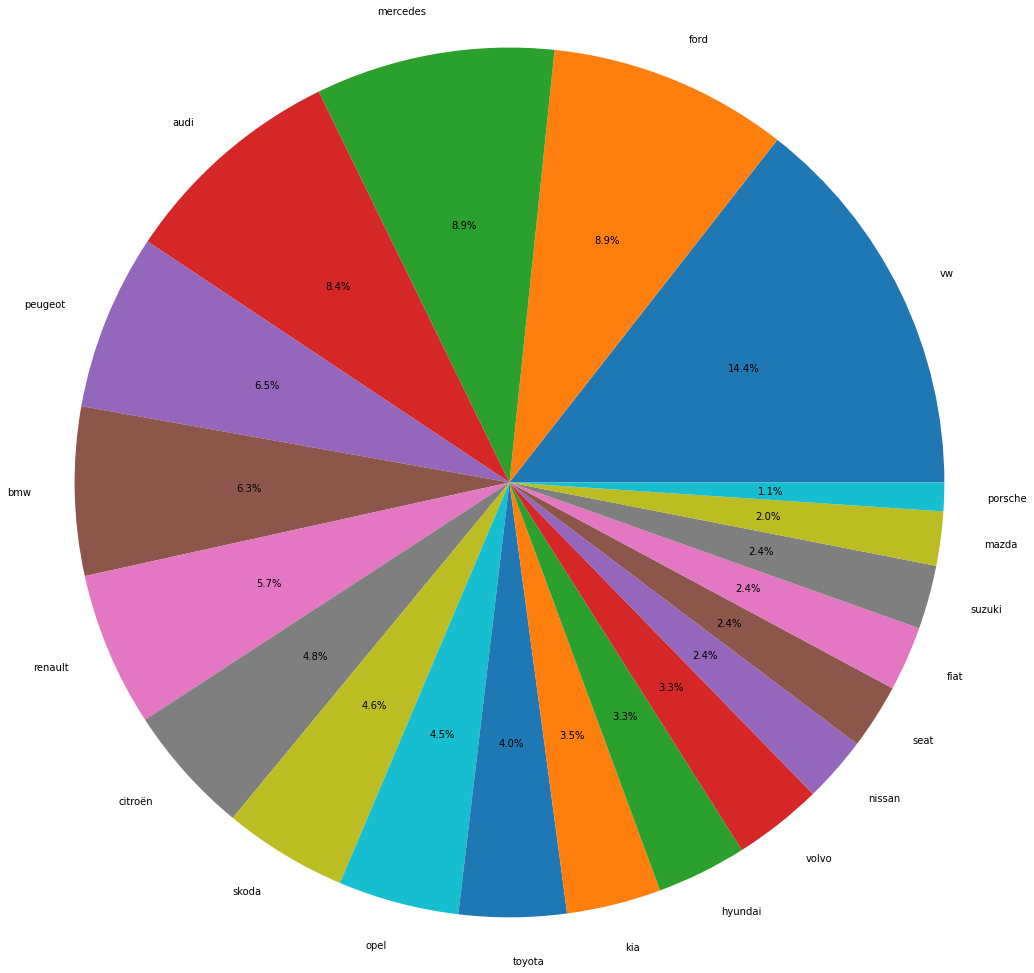

In [2]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

re = requests.get('http://notebookserver:5000/api/manufactorcount')

json_dump = json.dumps(re.text)

df = pd.read_json(re.text)

pd.set_option("display.max.columns", None)
make = list(df.iloc[0, 0:20])
count = list(df.iloc[1, 0:20])
width = 1
fig = plt.pie(count,labels=make, autopct='%1.1f%%', radius = 5)











<Figure size 432x288 with 0 Axes>

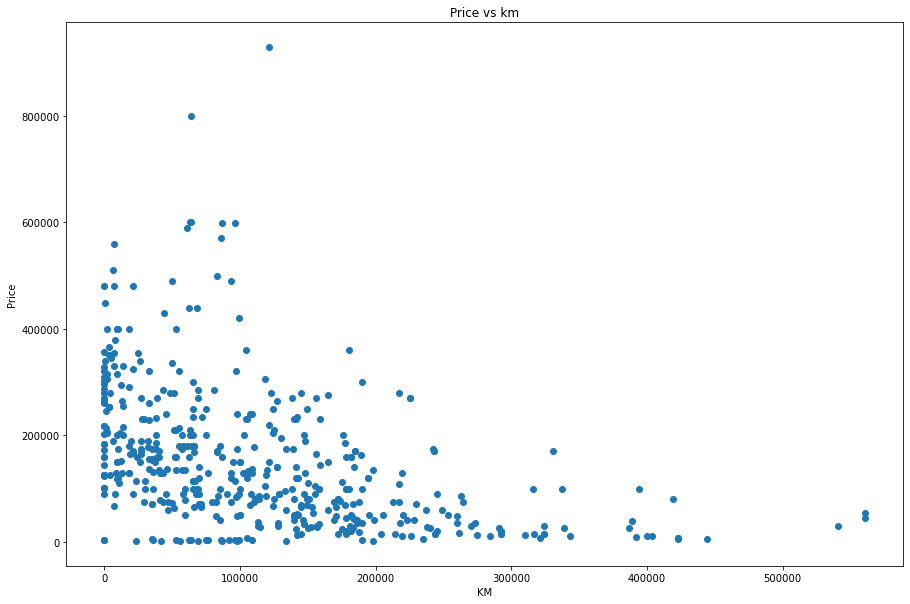

In [3]:

plt.clf()
re = requests.get('http://notebookserver:5000/api/pricemiles')
df = pd.read_json(re.text)
#Make all non-numeric entries to NaN.
numbersOnlyPrice = pd.to_numeric(df.iloc[1], errors='coerce')
numbersOnlyMiles = pd.to_numeric(df.iloc[0], errors='coerce')

plt.figure(figsize=(15,10))
plt.scatter(numbersOnlyMiles, numbersOnlyPrice)
plt.title('Price vs km')
plt.xlabel('KM')
plt.ylabel('Price')
plt.show() 


<Figure size 432x288 with 0 Axes>

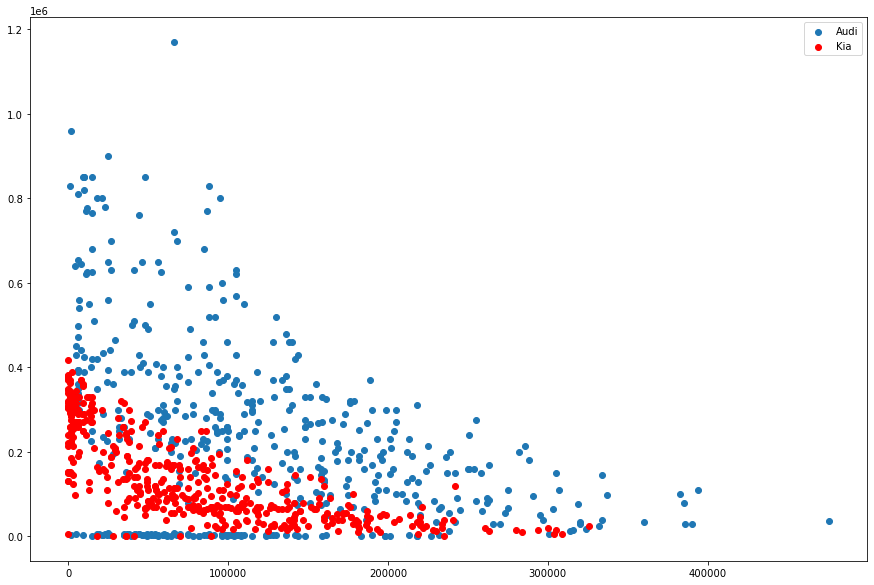

In [4]:

plt.clf()
audi = requests.get('http://notebookserver:5000/api/pricemiles/make?make=audi')
kia = requests.get('http://notebookserver:5000/api/pricemiles/make?make=kia')
audiDf = pd.read_json(audi.text)
kiaDf = pd.read_json(kia.text)
#df[df.id.apply(lambda x: x.isnumeric())]
#Make all non-numeric entries to NaN.
numbersOnlyPriceAudi = pd.to_numeric(audiDf.iloc[1], errors='coerce')
numbersOnlyMilesAudi = pd.to_numeric(audiDf.iloc[0], errors='coerce')
numbersOnlyPriceKia = pd.to_numeric(kiaDf.iloc[1], errors='coerce')
numbersOnlyMilesKia = pd.to_numeric(kiaDf.iloc[0], errors='coerce')

plt.figure(figsize=(15,10))
plt.scatter(numbersOnlyMilesAudi, numbersOnlyPriceAudi, label='Audi')
plt.scatter(numbersOnlyMilesKia, numbersOnlyPriceKia, c= 'r', label='Kia')
plt.legend()
plt.show() 

<BarContainer object of 6 artists>

<Figure size 432x288 with 0 Axes>

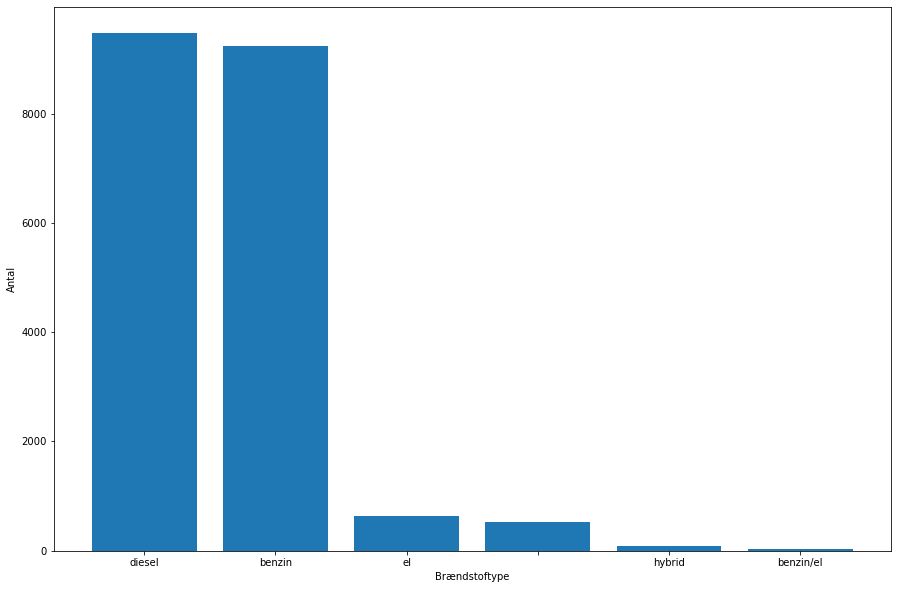

In [5]:
plt.clf()
fuelTypes = requests.get('http://notebookserver:5000/api/fueltype')
df = pd.read_json(fuelTypes.text)
fuelTypes = df.iloc[0]
fuelCounts = df.iloc[1]
plt.figure(figsize=(15,10))
plt.xlabel('Brændstoftype')
plt.ylabel('Antal')
plt.bar(fuelTypes, fuelCounts)

<Figure size 432x288 with 0 Axes>

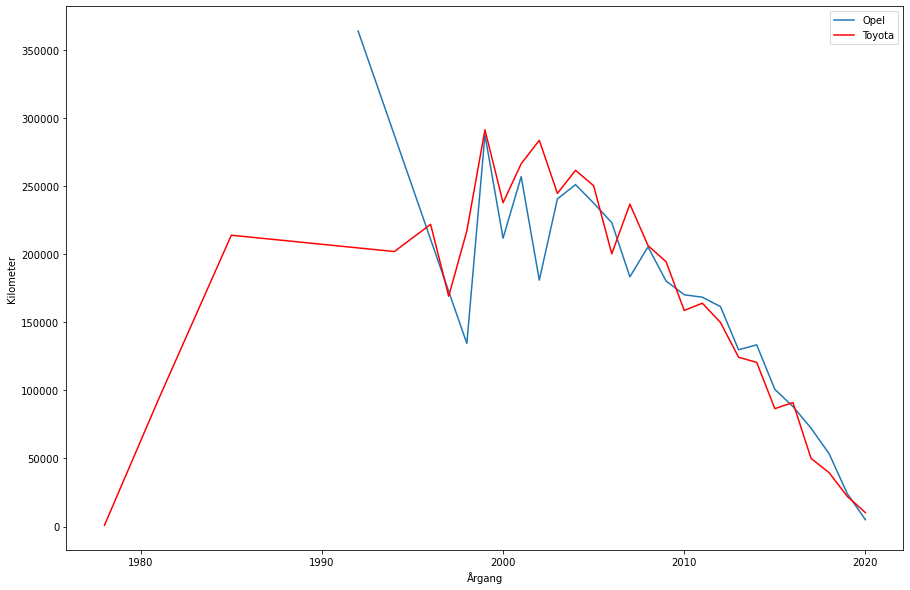

In [6]:
plt.clf()
year_kilometer_opel = requests.get('http://notebookserver:5000/api/yearkilometer?make=opel')
year_kilometer_toyota = requests.get('http://notebookserver:5000/api/yearkilometer?make=toyota')
opelDf = pd.read_json(year_kilometer_opel.text, orient='index')
toyotaDf = pd.read_json(year_kilometer_toyota.text, orient='index')

sorted_opel_df = opelDf.sort_values("Årgang", ascending=False)
sorted_toyota_df = toyotaDf.sort_values("Årgang", ascending=False)

sorted_and_grouped_opel_df = sorted_opel_df.groupby(['Årgang']).mean()
sorted_and_grouped_toyota_df = sorted_toyota_df.groupby(['Årgang']).mean()

plt.figure(figsize=(15,10))
plt.xlabel('Årgang')
plt.ylabel('Kilometer')
plt.plot(sorted_and_grouped_opel_df, label='Opel')
plt.plot(sorted_and_grouped_toyota_df, c= 'r', label='Toyota')
plt.legend()
